In [1]:
import sys
import os

# moce two directories up and make that current directory
os.chdir("../..")
# print current directory
print(os.getcwd())

/Users/chinmayshrivastava/Documents/GitHub/RepoStateManager


In [2]:
from modules.tables.TextTableReader import TextTableReader

tr = TextTableReader(
    "tests/TableTransformer/test1.pdf",
    extract_using="camelot",
    verbose=False,
)

/Users/chinmayshrivastava/Documents/GitHub/RepoStateManager/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 1/1 [00:00<00:00, 10.65it/s]


In [3]:
tr.extract_all_data()

100%|██████████| 1/1 [00:01<00:00,  1.18s/it]


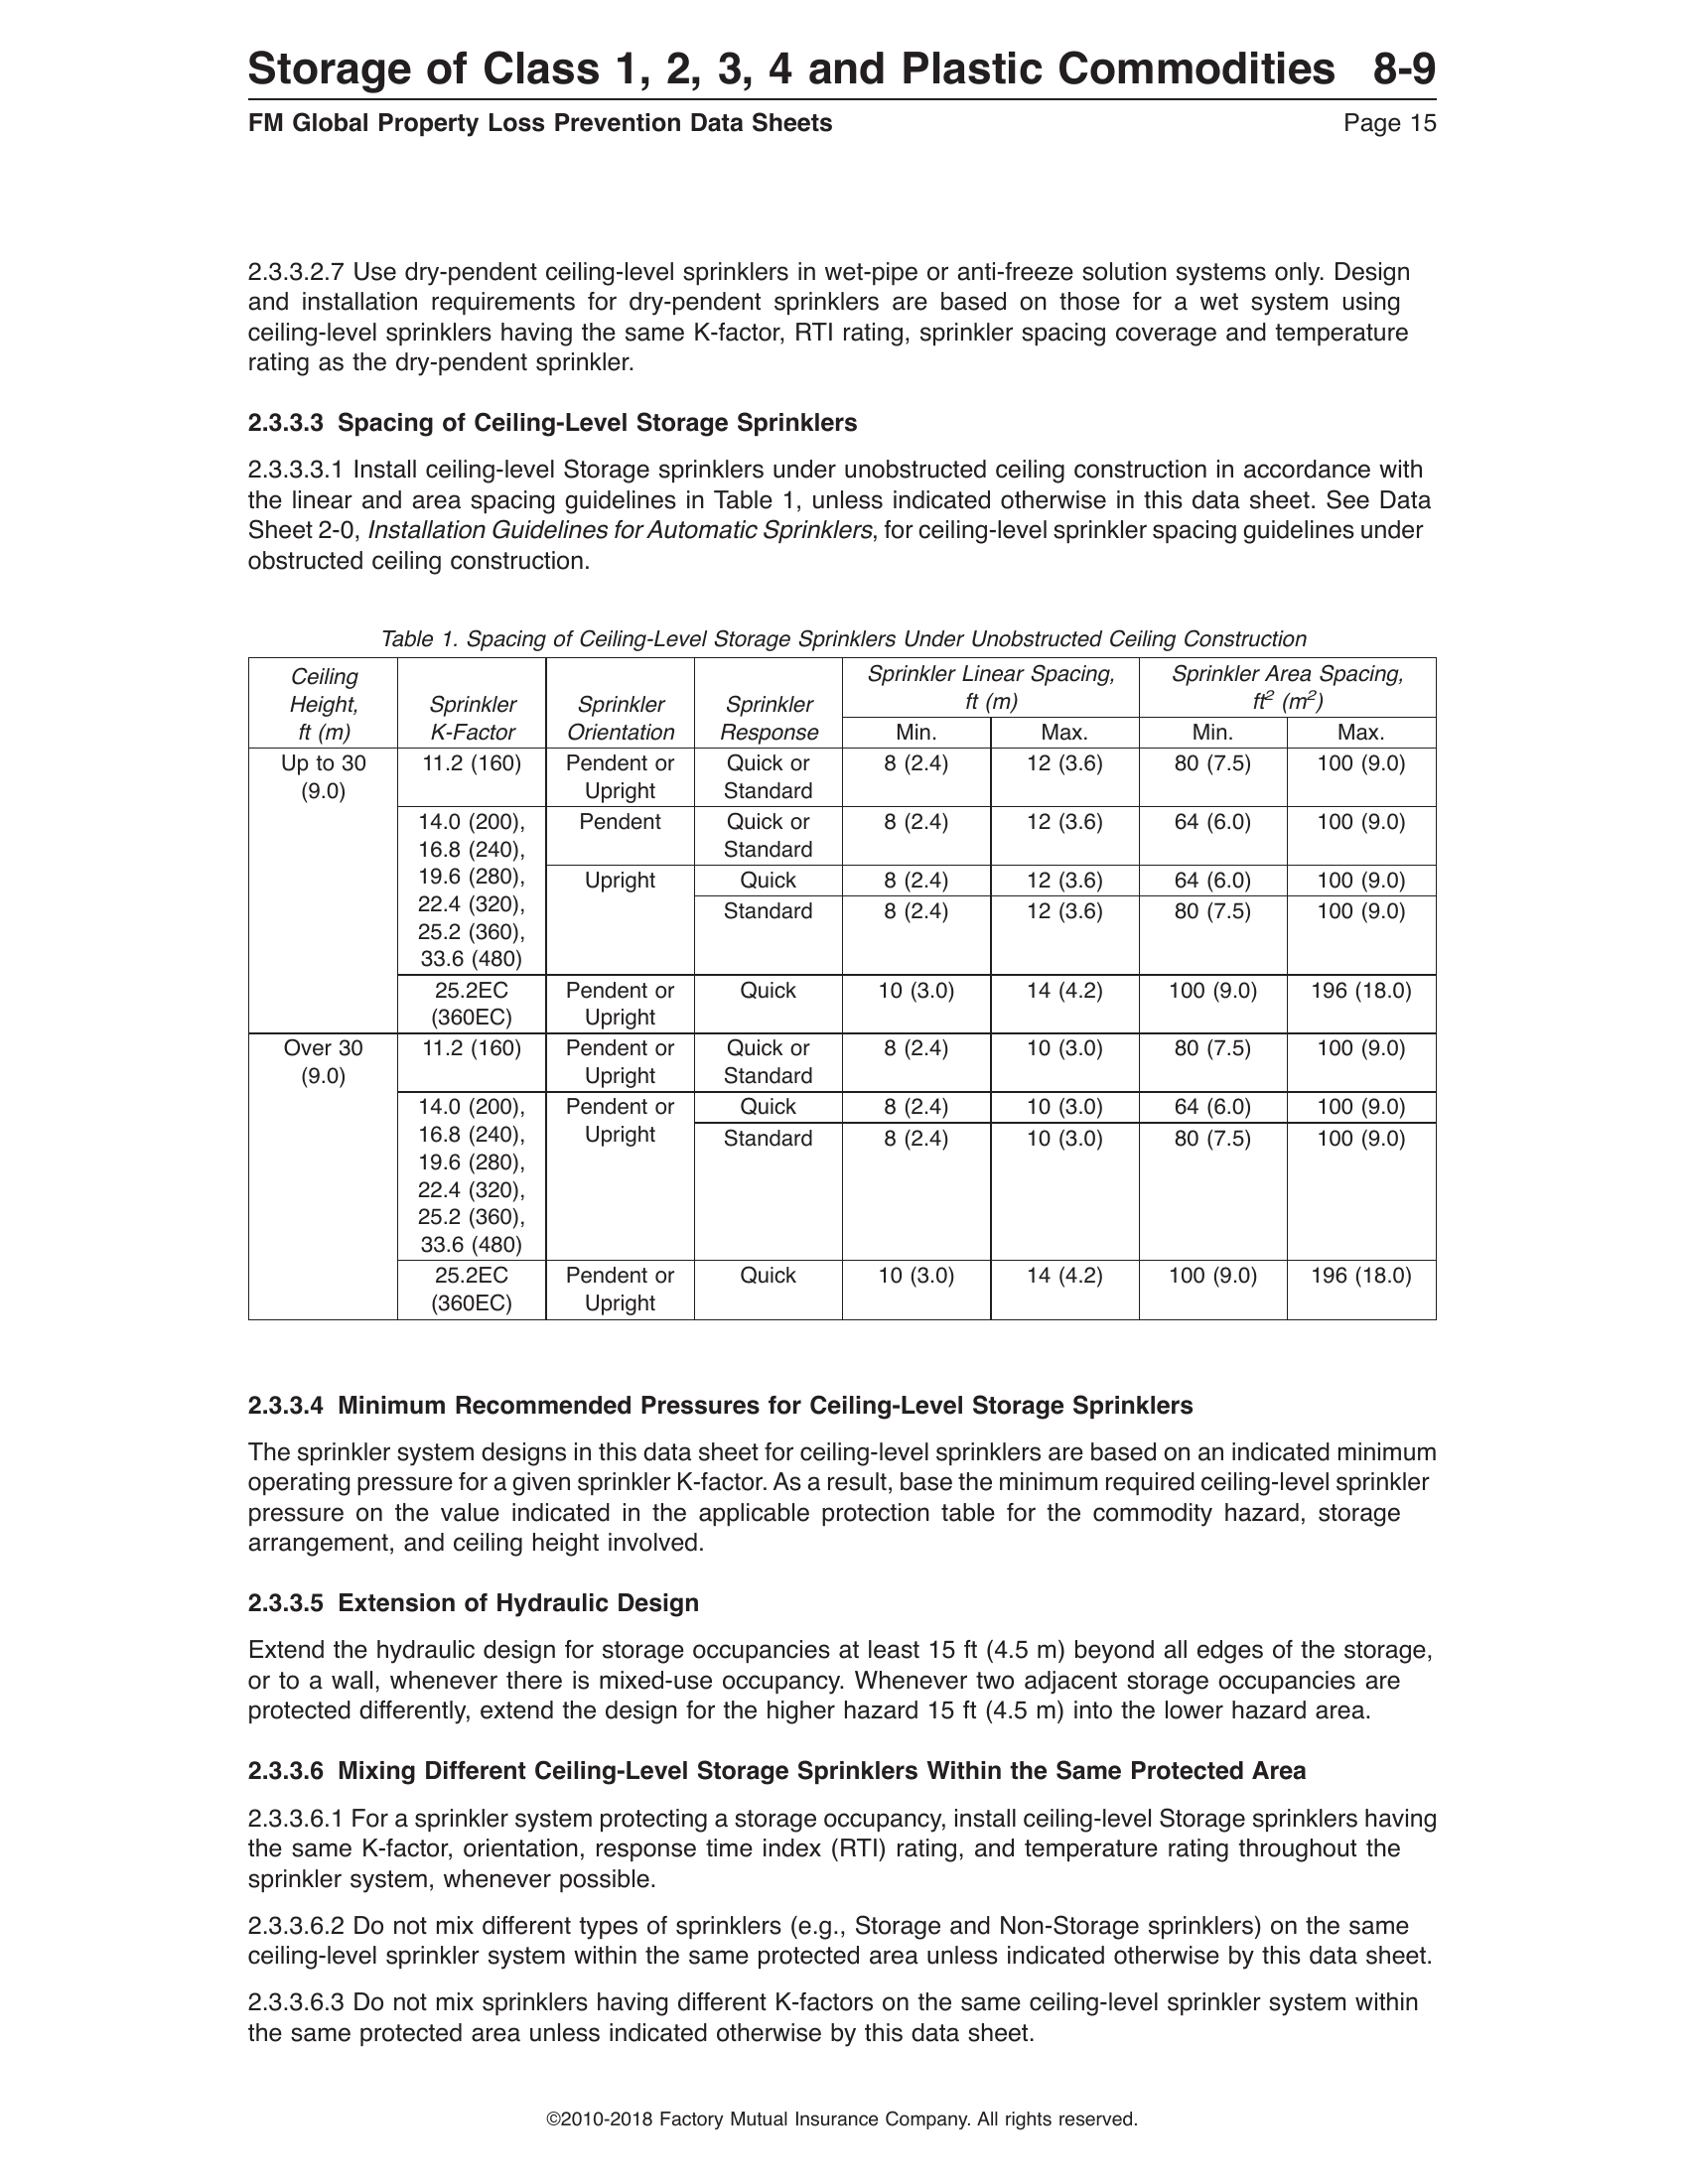

In [4]:
from PIL import ImageDraw
# get a page with a table or figure
page_no = 1
img = tr.pdf_images[page_no-1].image
# plot the image img in a small size
draw = ImageDraw.Draw(img)
# show the image
img

In [5]:
camelot_data = tr.tables_by_page_structure[page_no-1][0]

In [6]:
camelot_data.__dict__

{'cols': [(90.21000000000001, 144.23999999999998),
  (144.23999999999998, 198.0),
  (198.0, 251.76),
  (251.76, 305.52),
  (305.52, 359.28),
  (359.28, 413.03999999999996),
  (413.03999999999996, 466.79999999999995),
  (466.79999999999995, 521.16)],
 'rows': [(553.4437499999999, 531.9000000000001),
  (531.9000000000001, 520.8),
  (520.8, 499.68),
  (499.68, 478.56),
  (478.56, 467.28),
  (467.28, 438.47999999999996),
  (438.47999999999996, 417.35999999999996),
  (417.35999999999996, 396.24),
  (396.24, 384.96),
  (384.96, 335.03999999999996),
  (335.03999999999996, 313.32)],
 'cells': [[<Cell x1=90 y1=532 x2=144 y2=553>,
   <Cell x1=144 y1=532 x2=198 y2=553>,
   <Cell x1=198 y1=532 x2=252 y2=553>,
   <Cell x1=252 y1=532 x2=306 y2=553>,
   <Cell x1=306 y1=532 x2=359 y2=553>,
   <Cell x1=359 y1=532 x2=413 y2=553>,
   <Cell x1=413 y1=532 x2=467 y2=553>,
   <Cell x1=467 y1=532 x2=521 y2=553>],
  [<Cell x1=90 y1=521 x2=144 y2=532>,
   <Cell x1=144 y1=521 x2=198 y2=532>,
   <Cell x1=198 y1=5

In [7]:
camelot_data._image

(array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [8]:
camelot_data._bbox

(89.75999999999999, 312.96, 521.52, 553.92)

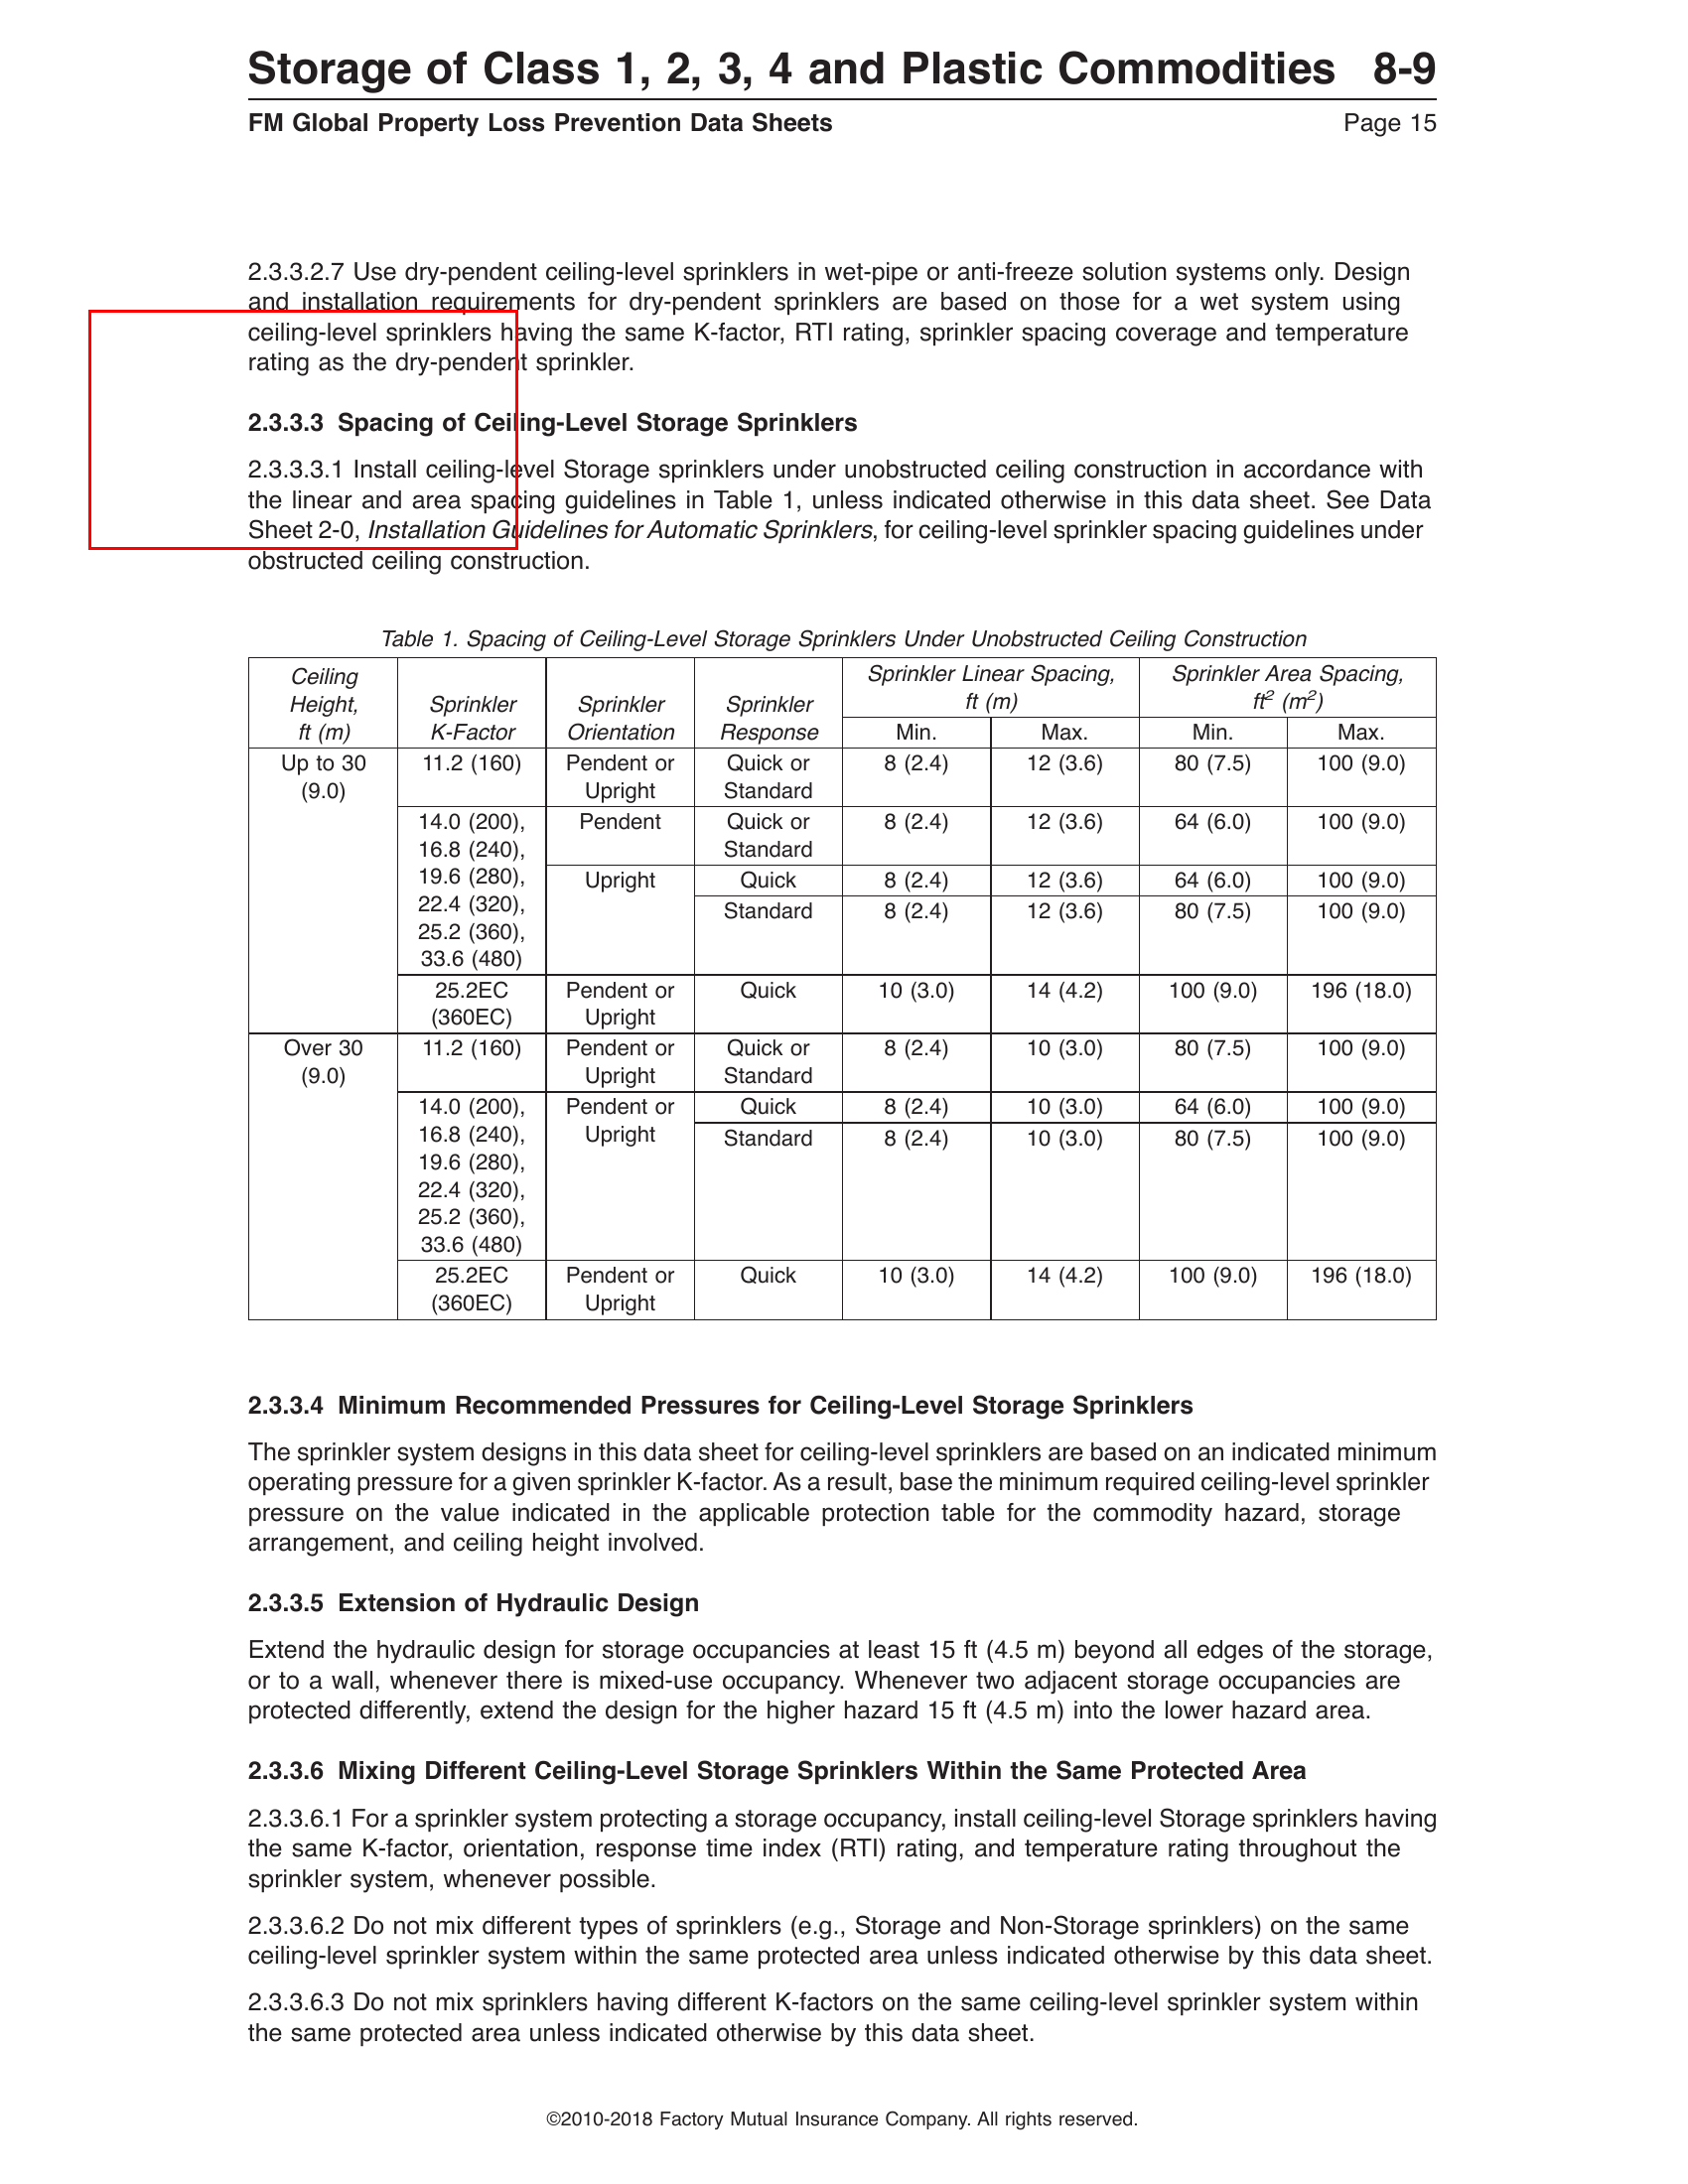

In [9]:
# camelot_data dict keys -> dict_keys(['cols', 'rows', 'cells', 'df', 'shape', 'accuracy', 'whitespace', 'order', 'page', 'flavor', '_text', '_image', '_segments', '_textedges', '_bbox'])
# update the image with the table bounding box
# scale the bbox
bbox = [x for x in camelot_data._bbox]
draw.rectangle(bbox, outline="red", width=3)
# show the image
img

In [10]:
import easyocr

In [11]:
# get the text from the image
reader = easyocr.Reader(['en'])
result = reader.readtext('tests/LayoutAnalysis/testimage.png', detail=0, paragraph=True)

In [12]:
result

['Storage of Class 4,2, 3, 4 and Plastic Commodities_ 8-9 FM Global Property Loss Prevention Data Sheets Page 15',
 '2.3.3.2.7 Use dry-pendent ceiling-level sprinklers in wet-pipe or anti-freeze solution systems only: Design and installation requirements for dry-pendent sprinklers are based on those for a wet system using ceiling-level sprinklers having the same K-factor; RTI rating; sprinkler spacing coverage and temperature rating as the dry-pendent sprinkler:',
 '2.3.3.3 Spacing of Ceiling-Level Storage Sprinklers 2.3.3.3.1 Install ceiling-level Storage sprinklers under unobstructed ceiling construction in accordance with the linear and area spacing guidelines in Table unless indicated otherwise in this data sheet. See Data Sheet 2-0, Installation Guidelines for Automatic Sprinklers; for ceiling-level sprinkler spacing guidelines under obstructed ceiling construction.',
 'Table',
 'Spacing of Ceiling-Level Storage Sprinklers Under Unobstructed Ceiling Construction Sprinkler Linear S

In [43]:
from img2table.ocr import EasyOCR
from img2table.document import PDF
# import bytesio
import io

# Instantiation of OCR
ocr = EasyOCR()

# PIL_src = tr.pdf_images[page_no-1].image
# # make _src a bytesio object
# _src = io.BytesIO()
# PIL_src.save(_src, format='PNG')
# _src.seek(0)
# # instantiate a document

doc = PDF("tests/TableTransformer/fm89.pdf")

# Table extraction
extracted_tables = doc.extract_tables(ocr=ocr,
                                      implicit_rows=False,
                                      borderless_tables=False,
                                      min_confidence=55)

In [44]:
extracted_tables

{0: [],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [ExtractedTable(title=Storage of Class 1, 2, 3, 4 and Plastic Commodities
  8-9
  FM Global Property Loss Prevention Data Sheets
  Page 7, bbox=(250, 266, 1446, 1861),shape=(1, 2))],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [ExtractedTable(title=Table 1. Spacing of Ceiling-Level Storage Sprinklers Under Unobstructed Ceiling Construction, bbox=(250, 662, 1445, 1329),shape=(11, 8))],
 15: [],
 16: [],
 17: [ExtractedTable(title=(K360)
  K25.2
  280°F
  (0.5)
  (0.5)
  (0.5)
  @ 20
  @ 20
  @ 20, bbox=(138, 274, 1933, 809),shape=(11, 22))],
 18: [ExtractedTable(title=(0.7) 10
  (0.7) 10
  (K360)
  K25.2
  @ 20
  @ 25
  (0.5)
  (0.5)
  @ 20
  @ 20
  (140°C), bbox=(138, 274, 1933, 868),shape=(11, 22))],
 19: [ExtractedTable(title=(0.7) 10
  (0.7) 10
  (K360)
  K25.2
  @ 20
  @ 25
  (0.5)
  (0.5)
  (0.5)
  @ 20
  @ 20
  @ 20
  (140°C), bbox=(138, 274, 1933, 868),shape=(11, 22))],
 20: [ExtractedTable(title=(0.7) 10
 

In [40]:
table = extracted_tables[0][0]
table.__dict__.keys()

dict_keys(['bbox', 'title', 'content'])

In [42]:
type(table)

img2table.tables.objects.extraction.ExtractedTable

In [37]:
table.df

0  \
0   Ceiling\nHeight,\nft (m)   
1   Ceiling\nHeight,\nft (m)   
2            Up to 30\n(9.0)   
3            Up to 30\n(9.0)   
4            Up to 30\n(9.0)   
5            Up to 30\n(9.0)   
6            Up to 30\n(9.0)   
7             Over 30\n(9.0)   
8             Over 30\n(9.0)   
9             Over 30\n(9.0)   
10            Over 30\n(9.0)   

                                                    1                       2  \
0                                 Sprinkler\nK-Factor  Sprinkler\nOrientation   
1                                 Sprinkler\nK-Factor  Sprinkler\nOrientation   
2                                          11.2 (160)     Pendent or\nUpright   
3   14.0 (200),\n16.8 (240),\n19.6 (280),\n22.4 (3...                 Pendent   
4   14.0 (200),\n16.8 (240),\n19.6 (280),\n22.4 (3...                 Upright   
5   14.0 (200),\n16.8 (240),\n19.6 (280),\n22.4 (3...                 Upright   
6                                     25.2EC\n(360EC)     Pendent or\nUpright   
7                                          11.2 (160)     Pendent or\nUpright   
8   14.0 (200),\n16.8 (240),\n19.6 (280),\n22.4 (3...     Pendent or\nUpright   
9   14.0 (200),\n16.8 (240),\n19.6 (280),\n22.4 (3...     Pendent or\nUpright   
10                                    25.2EC\n(360EC)     Pendent or\nUpright   

                      3                                  4  \
0   Sprinkler\nResponse  Sprinkler Linear Spacing,\nft (m)   
1   Sprinkler\nResponse                               Min.   
2    Quick or\nStandard                            8 (2.4)   
3    Quick or\nStandard                            8 (2.4)   
4                 Quick                            8 (2.4)   
5              Standard                            8 (2.4)   
6                 Quick                           10 (3.0)   
7    Quick or\nStandard                            8 (2.4)   
8                 Quick                            8 (2.4)   
9              Standard                            8 (2.4)   
10                Quick                           10 (3.0)   

                                    5                                  6  \
0   Sprinkler Linear Spacing,\nft (m)  Sprinkler Area Spacing,\nft2 (m2)   
1                                Max.                               Min.   
2                            12 (3.6)                           80 (7.5)   
3                            12 (3.6)                           64 (6.0)   
4                            12 (3.6)                           64 (6.0)   
5                            12 (3.6)                           80 (7.5)   
6                            14 (4.2)                          100 (9.0)   
7                            10 (3.0)                           80 (7.5)   
8                            10 (3.0)                           64 (6.0)   
9                            10 (3.0)                           80 (7.5)   
10                           14 (4.2)                          100 (9.0)   

                                    7  
0   Sprinkler Area Spacing,\nft2 (m2)  
1                                Max.  
2                           100 (9.0)  
3                           100 (9.0)  
4                           100 (9.0)  
5                           100 (9.0)  
6                          196 (18.0)  
7                           100 (9.0)  
8                           100 (9.0)  
9                           100 (9.0)  
10                         196 (18.0)

## OCR on image is missing some important things like (m2) and so let's stick to pdf based table extraction.

In [38]:
import cv2
from PIL import Image as PILImage

# Display extracted tables
table_img = cv2.imread("tests/LayoutAnalysis/testimage.png")

for table in extracted_tables:
    for row in table.content.values():
        for cell in row:
            cv2.rectangle(table_img, (cell.bbox.x1, cell.bbox.y1), (cell.bbox.x2, cell.bbox.y2), (255, 0, 0), 2)
            
PILImage.fromarray(table_img)

AttributeError: 'int' object has no attribute 'content'

In [36]:
table.content

OrderedDict([(0,
              [TableCell(bbox=BBox(x1=155, y1=420, x2=251, y2=478), value='Ceiling\nHeight;\n(m)'),
               TableCell(bbox=BBox(x1=251, y1=420, x2=346, y2=478), value='Sprinkler\nK-Factor_'),
               TableCell(bbox=BBox(x1=346, y1=420, x2=442, y2=478), value='Sprinkler\nOrientalion'),
               TableCell(bbox=BBox(x1=442, y1=420, x2=538, y2=478), value='Sprinkler\nResponse'),
               TableCell(bbox=BBox(x1=538, y1=420, x2=729, y2=458), value='Sprinkler Linear Spacing;\n(m)'),
               TableCell(bbox=BBox(x1=538, y1=420, x2=729, y2=458), value='Sprinkler Linear Spacing;\n(m)'),
               TableCell(bbox=BBox(x1=729, y1=420, x2=920, y2=458), value='Sprinkler Area Spacing;'),
               TableCell(bbox=BBox(x1=729, y1=420, x2=920, y2=458), value='Sprinkler Area Spacing;')]),
             (1,
              [TableCell(bbox=BBox(x1=155, y1=420, x2=251, y2=478), value='Ceiling\nHeight;\n(m)'),
               TableCell(bbox=BBox(x1=251, y

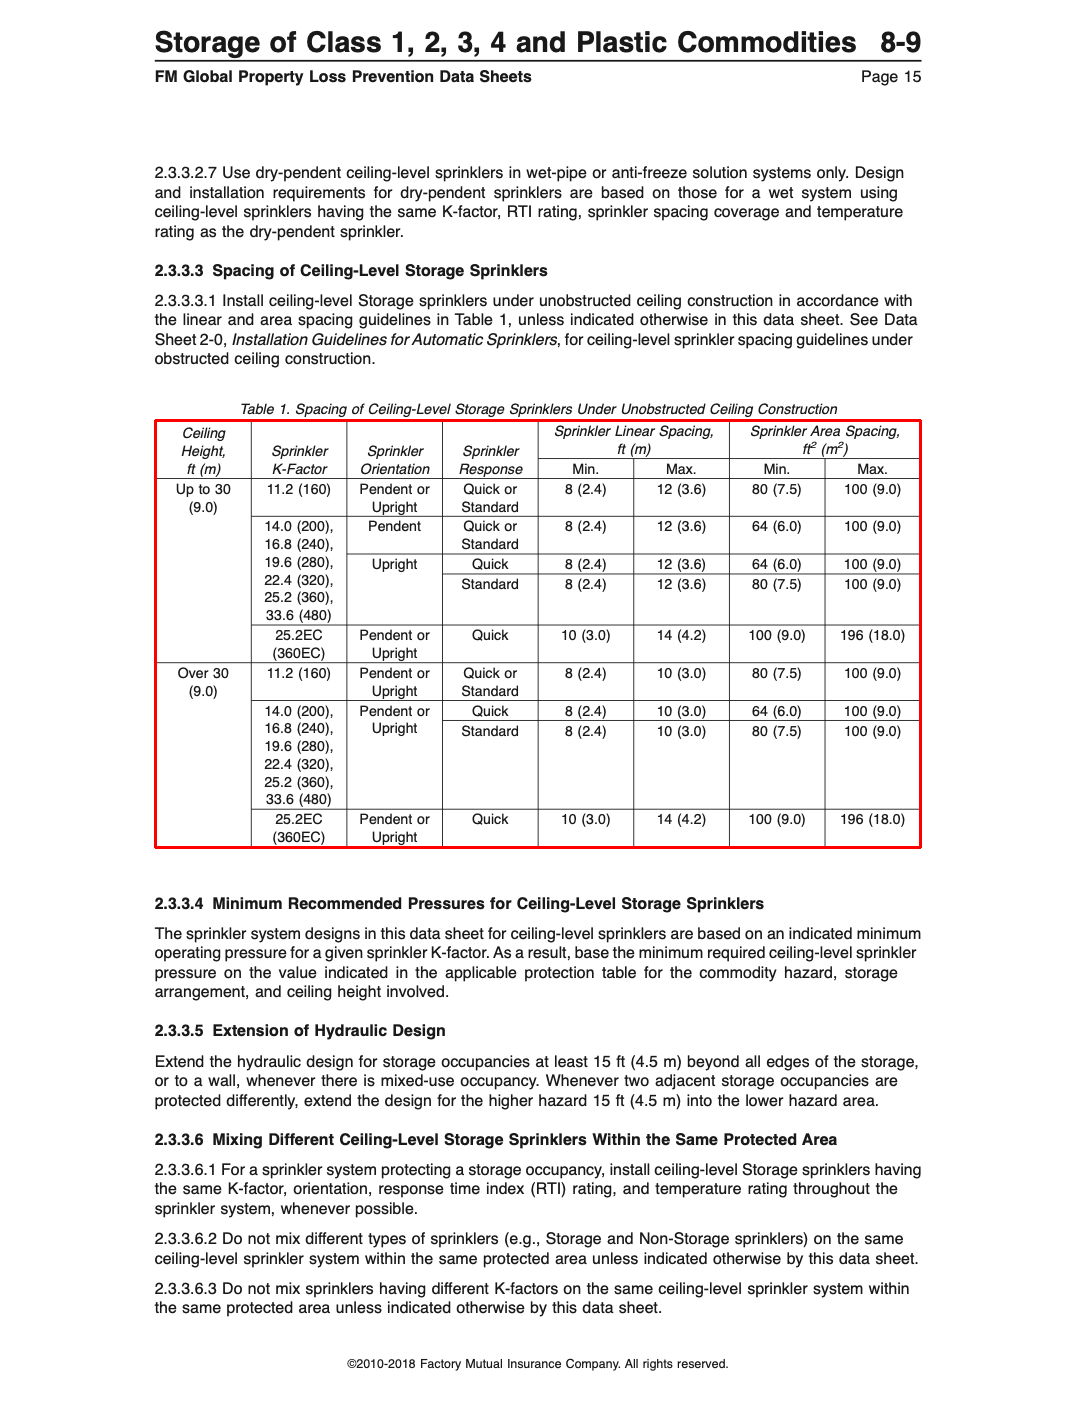

In [39]:
import cv2
from PIL import Image as PILImage

# Display extracted tables
table_img = cv2.imread("tests/LayoutAnalysis/testimage.png")

for table in extracted_tables:
    bbox = table.bbox
    cv2.rectangle(table_img, (bbox.x1, bbox.y1), (bbox.x2, bbox.y2), (255, 0, 0), 2)
            
PILImage.fromarray(table_img)

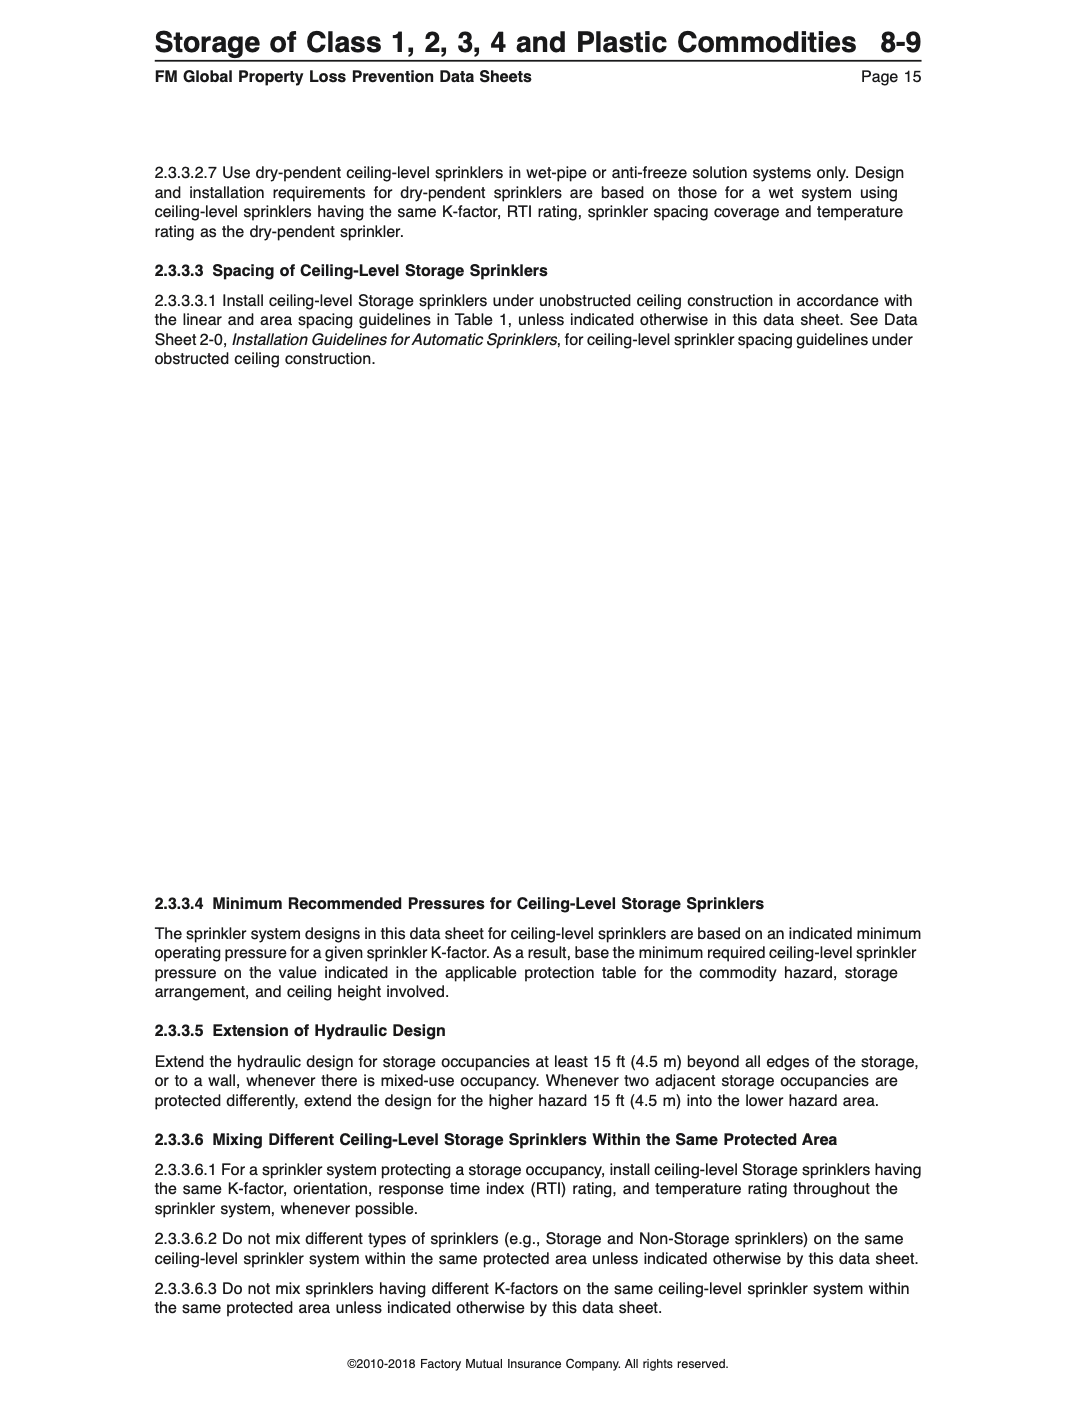

In [45]:
# mask the table in the image and export it
table_img = cv2.imread("tests/LayoutAnalysis/testimage.png")

# mask the table, and also add 20px padding
bbox = table.bbox
pad = 20
table_img[bbox.y1-pad:bbox.y2+pad, bbox.x1-pad:bbox.x2+pad] = 255

PILImage.fromarray(table_img)